<a href="https://colab.research.google.com/github/ugurtegin/Nonlinear_MMF_Network/blob/main/Exp_LinReg/Sinc_radmat_10x10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import tensorflow as tf


from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Activation, LSTM
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical, normalize

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io as sio
f = sio.loadmat('/content/drive/My Drive/Research/MMF_Reservoir/sinctry/res_sq_flt2_2.mat')
inp2 = f['res_sq_flt']

#Load data
f2 = sio.loadmat('/content/drive/My Drive/Research/MMF_Reservoir/sinctry/data.mat')

out = f2['y']
xx = f2['x']

In [ ]:
#inp2 = inp / np.linalg.norm(inp)
#inp2 = inp2*1000

In [3]:
input_data = inp2
output_data = out

print('input_data : ', input_data.shape, input_data.dtype)
print('output_class : ', output_data.shape, output_data.dtype)
print()

input_data :  (3000, 484) float64
output_class :  (3000, 1) float64



In [4]:
oran = 0.20
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=oran)

print('Test data : ', X_test.shape, X_test.dtype)
print('Training data : ', X_train.shape, X_train.dtype)
print()

Test data :  (600, 484) float64
Training data :  (2400, 484) float64



In [5]:
model = Sequential()
model.add(Dense(1, input_dim=484, activation='linear'))

In [6]:
loss='mean_squared_error' # mean_absolute_error, cosine_proximity
metrics = ['mean_squared_error']  # network accuracy metric to be determined after each epoch, mean_absolute_error, cosine_proximity

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt2, loss=loss, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 485       
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [7]:
#setting final parameters for the network and it begins to train
number_of_iterations = 50
#batch_size = 50

history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=number_of_iterations)
#history=model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=1, validation_data=(X_test, y_test))
#Number of iterations run: 900

Epoch 1/50
75/75 [==============================] - 0s 3ms/step - loss: 1.0217 - mean_squared_error: 1.0217 - val_loss: 0.4985 - val_mean_squared_error: 0.4985
Epoch 2/50
75/75 [==============================] - 0s 2ms/step - loss: 0.4073 - mean_squared_error: 0.4073 - val_loss: 0.3661 - val_mean_squared_error: 0.3661
Epoch 3/50
75/75 [==============================] - 0s 2ms/step - loss: 0.2786 - mean_squared_error: 0.2786 - val_loss: 0.2679 - val_mean_squared_error: 0.2679
Epoch 4/50
75/75 [==============================] - 0s 2ms/step - loss: 0.1982 - mean_squared_error: 0.1982 - val_loss: 0.1994 - val_mean_squared_error: 0.1994
Epoch 5/50
75/75 [==============================] - 0s 2ms/step - loss: 0.1456 - mean_squared_error: 0.1456 - val_loss: 0.1538 - val_mean_squared_error: 0.1538
Epoch 6/50
75/75 [==============================] - 0s 2ms/step - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 7/50
75/75 [======================

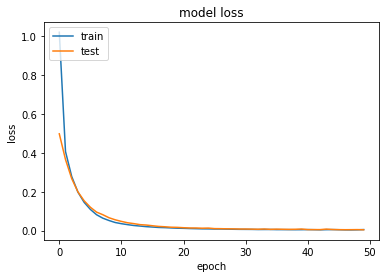

In [8]:
from google.colab import files
# summarize history for loss
ls=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.ylim(0.02,0.4)
ls.show()
#ls.savefig('/content/drive/My Drive/Sinc/loss-exp.png')
#files.download('loss-1.png')

In [9]:
abit = model.predict(inp2)
abit.shape

(3000, 1)

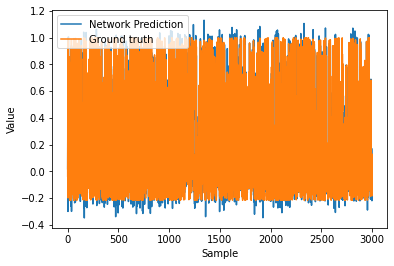

In [10]:
ls=plt.figure()
plt.plot(abit)
plt.plot(output_data)
plt.ylabel('Value')
plt.xlabel('Sample')
plt.legend(['Network Prediction', 'Ground truth'], loc='upper left')
ls.show()
#ls.savefig('/content/drive/My Drive/Sinc/est-exp.png')


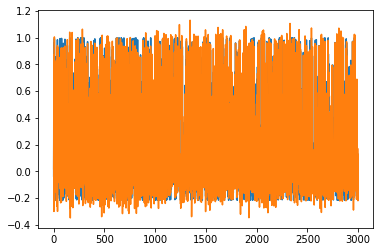

In [11]:
plt.plot(output_data)
plt.plot(abit)
ls.show()


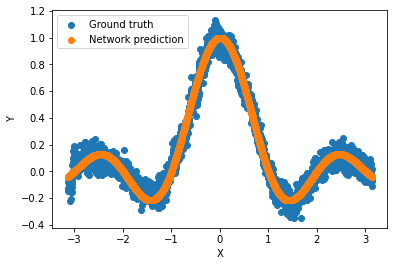

In [12]:
ls=plt.figure()
plt.scatter(xx,abit)
plt.scatter(xx,np.sinc(xx))
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(['Ground truth', 'Network prediction'], loc='upper left')
plt.show()
#ls.savefig('/content/drive/My Drive/Sinc/sinc-exp.png')


In [13]:
abit = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE ' + str(mean_squared_error(abit, y_test)))
print('RMSE ' + str(np.sqrt(mean_squared_error(abit, y_test))))

MSE 0.004327469400977591
RMSE 0.06578350401869447


In [14]:
abit = model.predict(inp2)
from sklearn.metrics import mean_squared_error
print('MSE ' + str(mean_squared_error(abit, output_data)))
print('RMSE ' + str(np.sqrt(mean_squared_error(abit, output_data))))

MSE 0.0032347719298509137
RMSE 0.05687505542723377


In [15]:
sio.savemat('/content/drive/My Drive/Research/MMF_Reservoir/sinctry/network_res.mat', {'y':out, 'x':xx, 'X_test':X_test, 'X_train':X_train, 'y_test':y_test, 'y_train':y_train,  'pred':abit})
